<a href="https://colab.research.google.com/github/cleifton/Data_Science/blob/master/Analise_Ibov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Analise de IBOV

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web

!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
yf.pdr_override()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 7.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [3]:
ibov = web.get_data_yahoo('^BVSP', start='2019-05-03', end='2022-12-05')

[*********************100%***********************]  1 of 1 completed


In [4]:
#Dados do IBOV
ibov.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-05-03,95521.0,96315.0,95521.0,96008.0,96008.0,4014800
2019-05-06,95992.0,95992.0,94540.0,95009.0,95009.0,3216000
2019-05-07,95009.0,95009.0,92750.0,94389.0,94389.0,4907400
2019-05-08,94389.0,96312.0,94389.0,95597.0,95597.0,4916500
2019-05-09,95597.0,95597.0,93883.0,94808.0,94808.0,4152200


In [5]:
#Desempenho no Ano 2022
ibov.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-11-28,108977.0,109476.0,108378.0,108782.0,108782.0,11492600
2022-11-29,108784.0,112187.0,108784.0,110910.0,110910.0,14721700
2022-11-30,110910.0,112486.0,110202.0,112486.0,112486.0,19703200
2022-12-01,112479.0,112479.0,110548.0,110926.0,110926.0,15193700
2022-12-02,110926.0,113761.0,109963.0,112056.0,112056.0,15982000


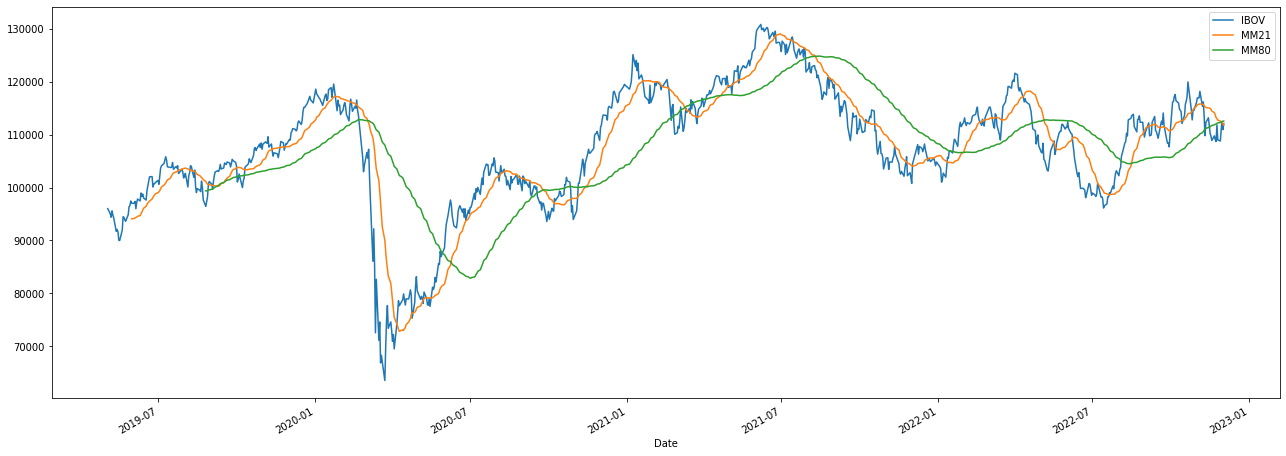

In [6]:
#Desempenho do IBOV em relação as medias 2 periodos e 80 periodos
ibov["Close"].plot(figsize=(22,8), label="IBOV")
ibov["Close"].rolling(21).mean().plot(label="MM21")
ibov["Close"].rolling(80).mean().plot(label="MM80")
plt.legend();

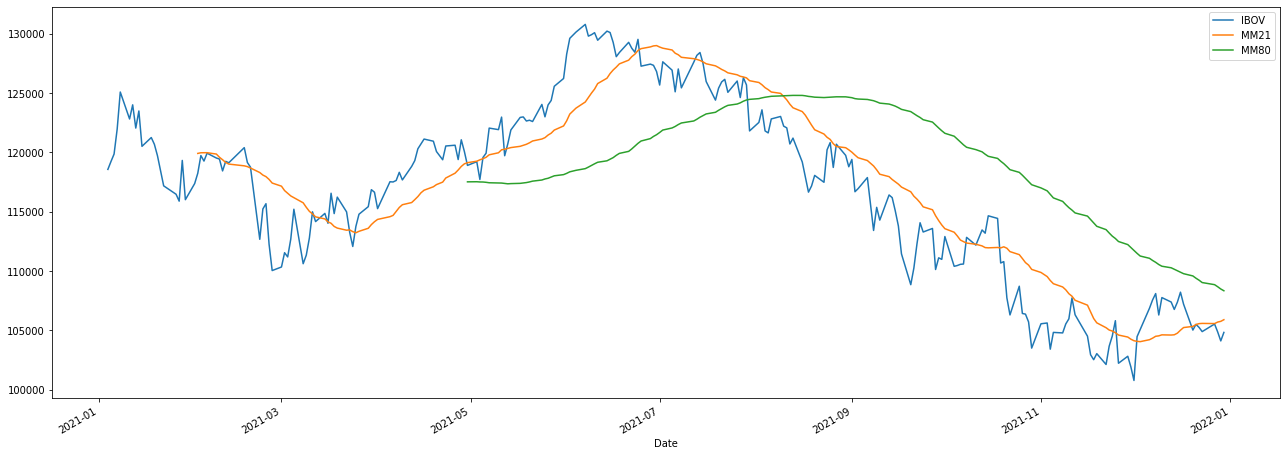

In [7]:
#Desempenho do IBOV 2021 em relação as medias 21 periodos e 80 periodos em 12 meses
ibov_fatiado = ibov[ibov.index.year == 2021]
ibov_fatiado["Close"].plot(figsize=(22,8), label="IBOV")
ibov_fatiado["Close"].rolling(21).mean().plot(label="MM21")
ibov_fatiado["Close"].rolling(80).mean().plot(label="MM80")
plt.legend();

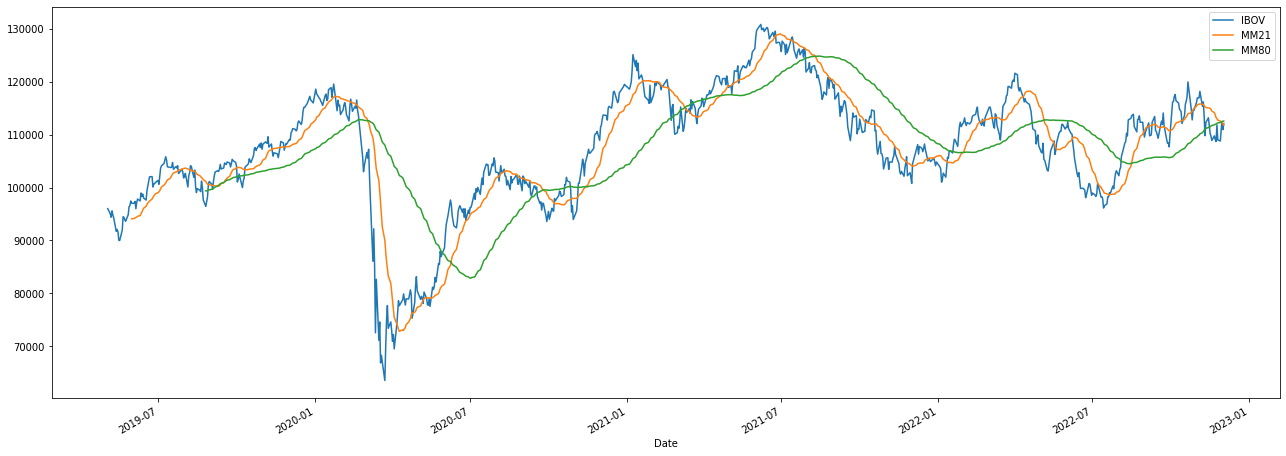

In [8]:
#Desempenho do IBOV nos anos 2018 a 2022
ibov_fatiado = ibov[(ibov.index.year >= 2016) & (ibov.index.year <= 2022)]
ibov_fatiado["Close"].plot(figsize=(22,8), label="IBOV")
ibov_fatiado["Close"].rolling(21).mean().plot(label="MM21")
ibov_fatiado["Close"].rolling(80).mean().plot(label="MM80")
plt.legend();

In [9]:
#Abertura do IBOV em 12 meses desde abertura e fechamento, com variação de maxima e minino do mensal 
ibov_fatiado = ibov[ibov.index.month == 12]
ibov_fatiado.tail(20)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-06,105070.0,107498.0,105070.0,106859.0,106859.0,11127500
2021-12-07,106868.0,108655.0,106868.0,107558.0,107558.0,11773100
2021-12-08,107558.0,108521.0,107309.0,108096.0,108096.0,13166800
2021-12-09,106573.0,106754.0,105890.0,106291.0,106291.0,11082900
2021-12-10,106296.0,108275.0,106296.0,107758.0,107758.0,10466000
2021-12-13,107758.0,109493.0,107383.0,107383.0,107383.0,12512300
2021-12-14,107387.0,109148.0,106445.0,106760.0,106760.0,11604300
2021-12-15,106763.0,107603.0,105697.0,107370.0,107370.0,12663100
2021-12-16,107433.0,109034.0,107433.0,108212.0,108212.0,13754600


In [10]:
#Abertura do IBOV em 30 meses desde abertura e fechamento, com variação de maxima e minino dos dias 15 de cada mês 
ibov_fatiado = ibov[ibov.index.day == 15]
ibov_fatiado.tail(30)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-05-15,92088.0,92088.0,90295.0,91623.0,91623.0,4791900
2019-07-15,103909.0,104578.0,103495.0,103803.0,103803.0,3995500
2019-08-15,100262.0,101014.0,98200.0,99057.0,99057.0,6585300
2019-10-15,104299.0,105048.0,104052.0,104490.0,104490.0,4093400
2020-01-15,117632.0,117632.0,116188.0,116414.0,116414.0,5569400
2020-04-15,79911.0,80035.0,77546.0,78831.0,78831.0,9758400
2020-05-15,79011.0,79538.0,77426.0,77557.0,77557.0,11718200
2020-06-15,92780.0,93112.0,90148.0,92376.0,92376.0,13317500
2020-07-15,100444.0,102114.0,100444.0,101791.0,101791.0,9285600
